# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units= "metric"    
query_url = f"{url}appid={weather_api_key}&units={units}&q="
example=cities[0]
exa_url = query_url+example
exa_weather = requests.get(exa_url).json()
exa_weather

{'coord': {'lon': -84.5333, 'lat': 39.1834},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': 21.63,
  'feels_like': 21.55,
  'temp_min': 19.71,
  'temp_max': 23.02,
  'pressure': 1021,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 200},
 'clouds': {'all': 20},
 'dt': 1698274240,
 'sys': {'type': 2,
  'id': 2005257,
  'country': 'US',
  'sunrise': 1698235068,
  'sunset': 1698273983},
 'timezone': -14400,
 'id': 4513583,
 'name': 'Hamilton',
 'cod': 200}

In [4]:
# Set the API base URL
url = https://api.openweathermap.org/data/2.5/weather?
units= "metric"    
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Object `weather` not found.
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hamilton
Processing Record 2 of Set 1 | kawerau
Processing Record 3 of Set 1 | queenstown
Processing Record 4 of Set 1 | agat village
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | tyukhtet
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | sao joao da barra
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | wotho
Processing Record 14 of Set 1 | newman
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | qinnan
Processing Record 19 of Set 1 | point pedro
Processing Record 20 of Set 1 | mont-dore
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set

Processing Record 38 of Set 4 | mammoth lakes
Processing Record 39 of Set 4 | enewetak
Processing Record 40 of Set 4 | tamanrasset
Processing Record 41 of Set 4 | lihue
Processing Record 42 of Set 4 | paoua
Processing Record 43 of Set 4 | copala
Processing Record 44 of Set 4 | bhimunipatnam
Processing Record 45 of Set 4 | valparaiso
Processing Record 46 of Set 4 | vorgashor
Processing Record 47 of Set 4 | mount pearl
Processing Record 48 of Set 4 | kabalo
Processing Record 49 of Set 4 | kanye
Processing Record 0 of Set 5 | kavieng
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | leh
Processing Record 3 of Set 5 | wailua homesteads
Processing Record 4 of Set 5 | parscov
Processing Record 5 of Set 5 | sarangani
Processing Record 6 of Set 5 | poronaysk
Processing Record 7 of Set 5 | haenam
Processing Record 8 of Set 5 | guanica
Processing Record 9 of Set 5 | luancheng
Processing Record 10 of Set 5 | kodiak
Processing Record 11 of Set 5 | masons bay
City not found

Processing Record 30 of Set 8 | wafangdian
Processing Record 31 of Set 8 | mili
Processing Record 32 of Set 8 | fougamou
Processing Record 33 of Set 8 | lamu
Processing Record 34 of Set 8 | shiyan
Processing Record 35 of Set 8 | plettenberg bay
Processing Record 36 of Set 8 | luchegorsk
Processing Record 37 of Set 8 | costa teguise
City not found. Skipping...
Processing Record 38 of Set 8 | quang ngai
Processing Record 39 of Set 8 | novo aripuana
Processing Record 40 of Set 8 | melfort
Processing Record 41 of Set 8 | tazacorte
Processing Record 42 of Set 8 | antonio enes
Processing Record 43 of Set 8 | tshikapa
Processing Record 44 of Set 8 | oban
Processing Record 45 of Set 8 | prince rupert
Processing Record 46 of Set 8 | brookings
Processing Record 47 of Set 8 | gorom-gorom
Processing Record 48 of Set 8 | cankuzo
Processing Record 49 of Set 8 | galle
Processing Record 0 of Set 9 | nguigmi
Processing Record 1 of Set 9 | namibe
Processing Record 2 of Set 9 | tranovaho
City not found. 

Processing Record 17 of Set 12 | weno
Processing Record 18 of Set 12 | oriximina
Processing Record 19 of Set 12 | taksimo
Processing Record 20 of Set 12 | canmore
Processing Record 21 of Set 12 | port saint john's
Processing Record 22 of Set 12 | nikolayevsk-on-amure
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hamilton,39.1834,-84.5333,23.02,66,99,0.45,US,1698274854
1,kawerau,-38.1000,176.7000,19.71,74,74,1.34,NZ,1698274946
2,queenstown,-31.8976,26.8753,11.91,86,9,0.69,ZA,1698275088
3,agat village,13.3886,144.6585,30.76,83,75,5.14,GU,1698275089
4,isafjordur,66.0755,-23.1240,2.69,90,91,3.14,IS,1698275090


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,23.02,66,99,0.45,US,1698274854
1,kawerau,-38.1000,176.7000,19.71,74,74,1.34,NZ,1698274946
2,queenstown,-31.8976,26.8753,11.91,86,9,0.69,ZA,1698275088
3,agat village,13.3886,144.6585,30.76,83,75,5.14,GU,1698275089
4,isafjordur,66.0755,-23.1240,2.69,90,91,3.14,IS,1698275090


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

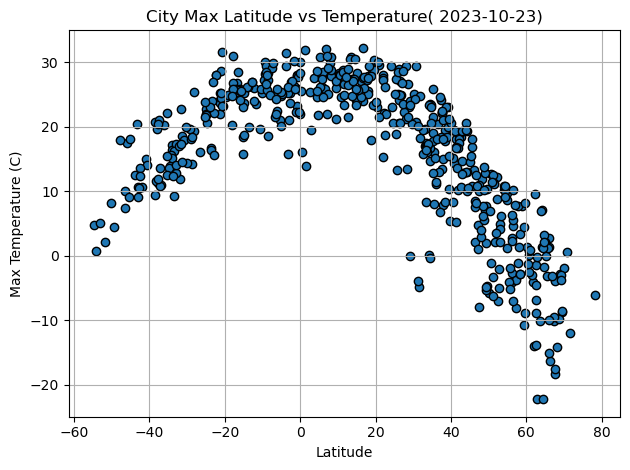

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature( 2023-10-23)")
plt.grid(True)
plt.tight_layout() 
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

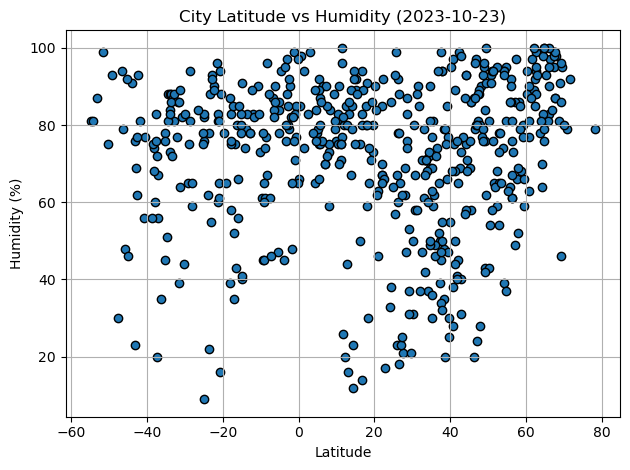

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2023-10-23)")
plt.grid(True)
plt.tight_layout() 
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

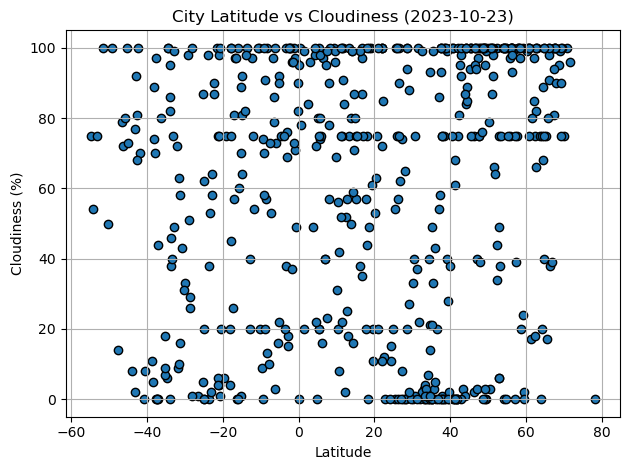

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2023-10-23)")
plt.grid(True)
plt.tight_layout() 
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

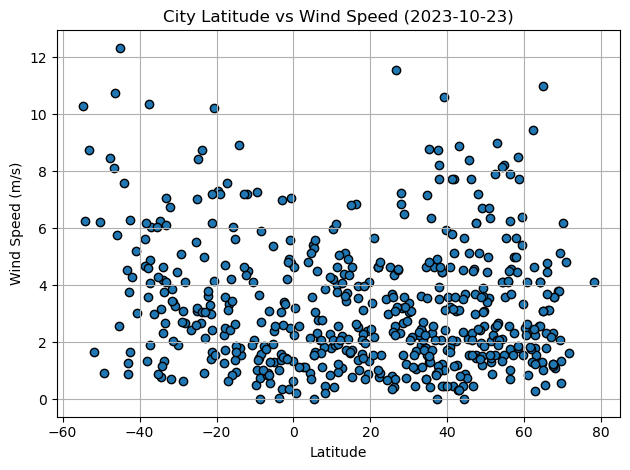

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2023-10-23)")
plt.grid(True)
plt.tight_layout() 
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, text_coordinates=(0,0)):
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x_values, y_values)
    regress_values=x_values*slope+intercept
    line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))
    # Create a scatter plot of the x and y values
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope
    plt.plot(x_values, regress_values, "r-")
    # Annotate the text for the line equation and add its coordinates
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
#     plt.title(title)
#     plt.xlabel(x_label)
#     plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    plt.show()


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hamilton,39.1834,-84.5333,23.02,66,99,0.45,US,1698274854
3,agat village,13.3886,144.6585,30.76,83,75,5.14,GU,1698275089
4,isafjordur,66.0755,-23.1240,2.69,90,91,3.14,IS,1698275090
5,tazovsky,67.4667,78.7000,-10.10,95,81,2.33,RU,1698275091
6,pacific grove,36.6177,-121.9166,20.39,74,20,4.63,US,1698275092


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]< 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kawerau,-38.1000,176.7000,19.71,74,74,1.34,NZ,1698274946
2,queenstown,-31.8976,26.8753,11.91,86,9,0.69,ZA,1698275088
8,blackmans bay,-43.0167,147.3167,9.18,69,92,0.89,AU,1698275095
9,waitangi,-43.9535,-176.5597,12.56,91,8,7.57,NZ,1698275096
10,sao joao da barra,-21.6403,-41.0511,24.05,96,100,3.32,BR,1698275097


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.858857506542705


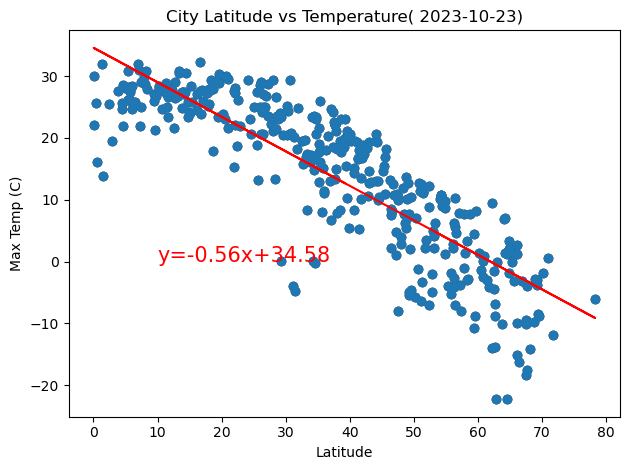

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("City Latitude vs Temperature( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],(10,0))

# Show plot
plt.show()


The r-value is: 0.8024504115650918


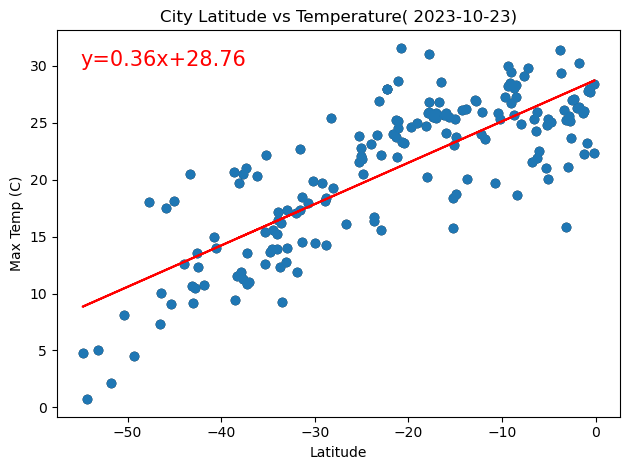

In [17]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("City Latitude vs Temperature( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],(-55,30))

# Show plot
plt.show()

**Discussion about the linear relationship:** 
Based on the above two charts, When moving away from equator the temperator noticeably decreases in both hemispheres. the regression line plotted on both scatter plots(which shows the relation between latitute and max temperature) for north hemisfere and south hemisfere highlight a strong correltion and also this is corrobated by the substantial r-values in both chartswhich exceed 0.8 indicating a robust correlation  as well.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.14071099353048236


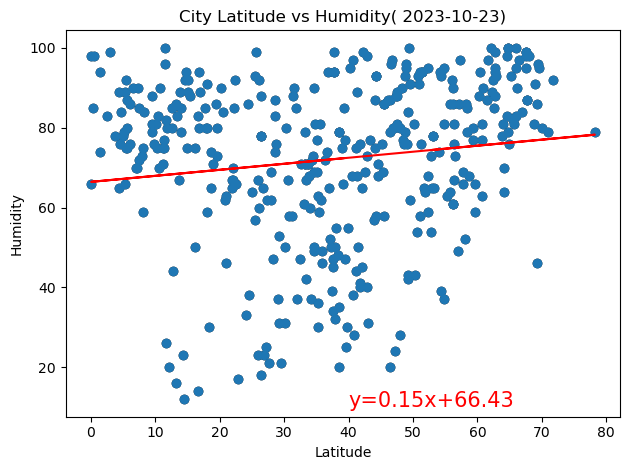

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],(40,10))

# Show plot
plt.show()

The r-value is: 0.09621232879115858


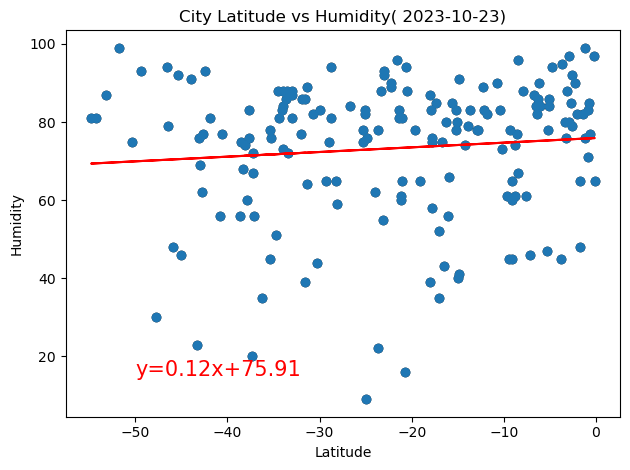

In [19]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. temperature
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],(-50,15))

# Show plot
plt.show()

**Discussion about the linear relationship:** The analysis of the two plots explores the potential relation and correlation between latitute and humidity.As we move away from the equator in either direction,there isn't a consistent trend of increasing or decreasing humidity the low r-value further emphasizes the weak correlation between these two variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.14775947122101404


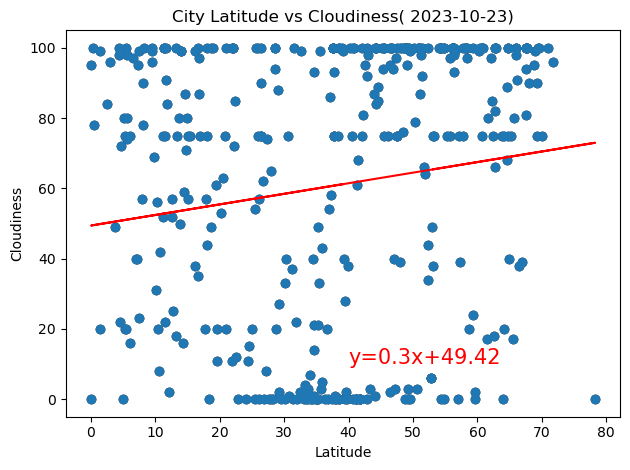

In [20]:
# Northern Hemisphere
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],(40,10))

# Show plot
plt.show()

The r-value is: 0.15109678163153648


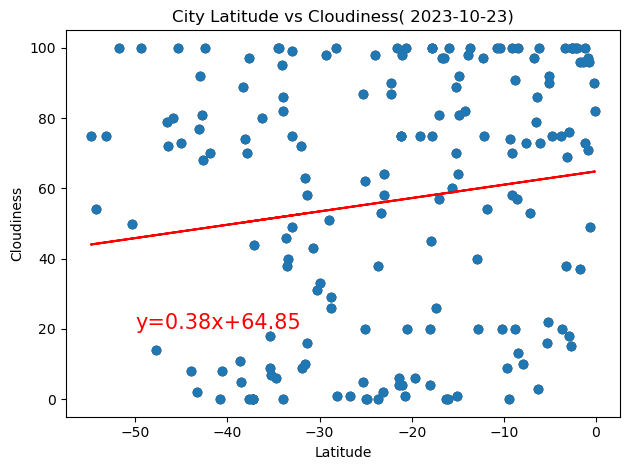

In [21]:
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],(-50,20))

# Show plot
plt.show()

**Discussion about the linear relationship:** In above two charts , the potential relation and correlation between latitude and cloudiness was explored and analysed.As showd there is not a consistent trend between cloudiness and latitude, the low r- value also emphasize the weak correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1020391511761945


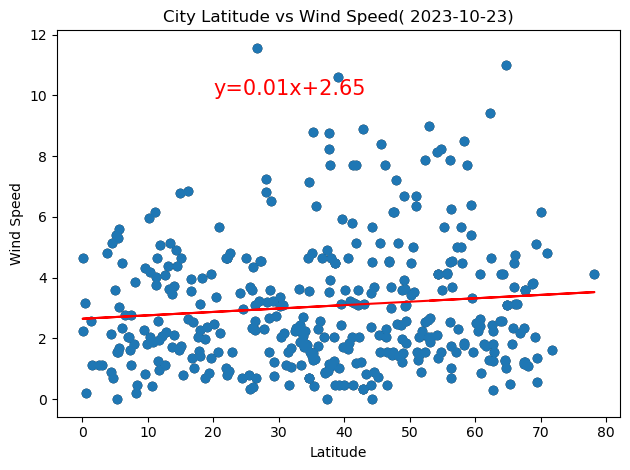

In [22]:
# Northern Hemisphere
# Build scatter plot for latitude vs. Wind Speed
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],(20,10))

# Show plot
plt.show()

The r-value is: -0.35195094106800423


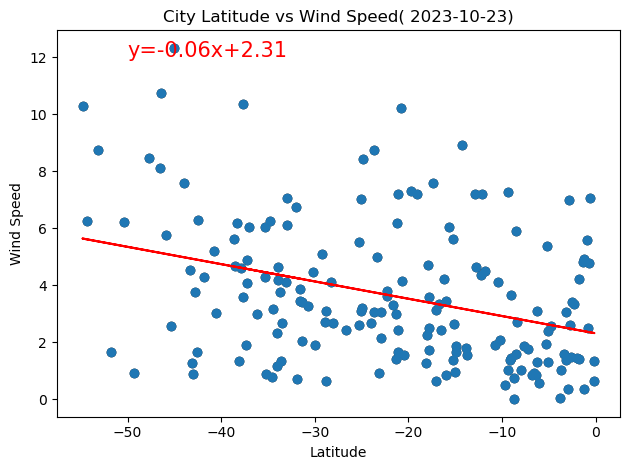

In [23]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere
# Build scatter plot for latitude vs. Cloudiness
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],edgecolors='black',color='blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed( 2023-10-23)")
plt.tight_layout() 
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],(-50,12))

# Show plot
plt.show()

**Discussion about the linear relationship:** From the above two scatter plots and the linear regression plotted on the scatter plots. there is not strong relation in north hemisphere between moving away from equator(increasing latitude) and the wind speed, as further highlighted by the low r-value. Conversly, the south hemisphere does show some correlation: as we move further from the equator, there appears to be a trend of increasing wind speed.However, it's worth noting that this correlation isn't particularly strong, with an r-value of 0.35.